In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [6]:
df['fueltype'].astype('category').value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [7]:
df['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [8]:
df['horsepower'].astype('category').value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
62      6
160     6
101     6
88      6
90      5
102     5
76      5
97      5
82      5
84      5
145     5
111     4
123     4
92      4
86      4
73      3
121     3
207     3
182     3
152     3
85      3
100     2
52      2
184     2
112     2
94      2
162     2
176     2
161     2
56      2
156     2
155     2
175     1
262     1
154     1
200     1
48      1
143     1
142     1
140     1
135     1
134     1
120     1
115     1
106     1
78      1
72      1
64      1
60      1
58      1
55      1
288     1
Name: horsepower, dtype: int64

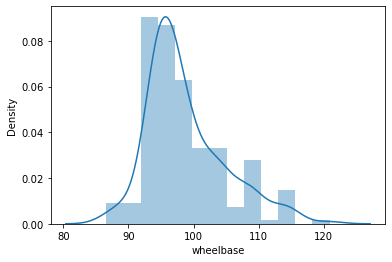

In [16]:

sns.distplot(df['wheelbase'])
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

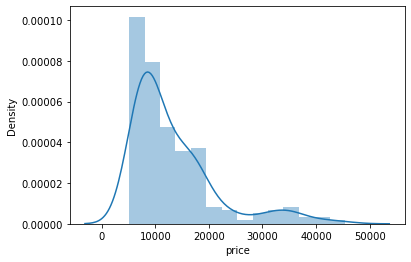

In [14]:
# target variable: price of car
sns.distplot(df['price'])


<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

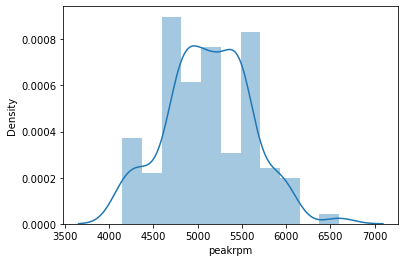

In [17]:
sns.distplot(df['peakrpm'])

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

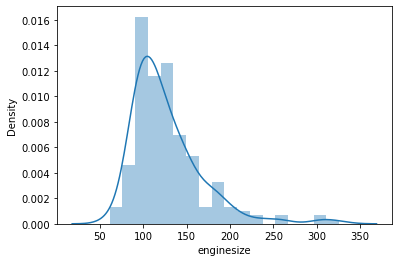

In [19]:
sns.distplot(df['enginesize'])

In [20]:
df_new = df.select_dtypes(include=['int','float'])

In [22]:
df_new.head(4)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0


In [27]:
cor = df_new.corr()

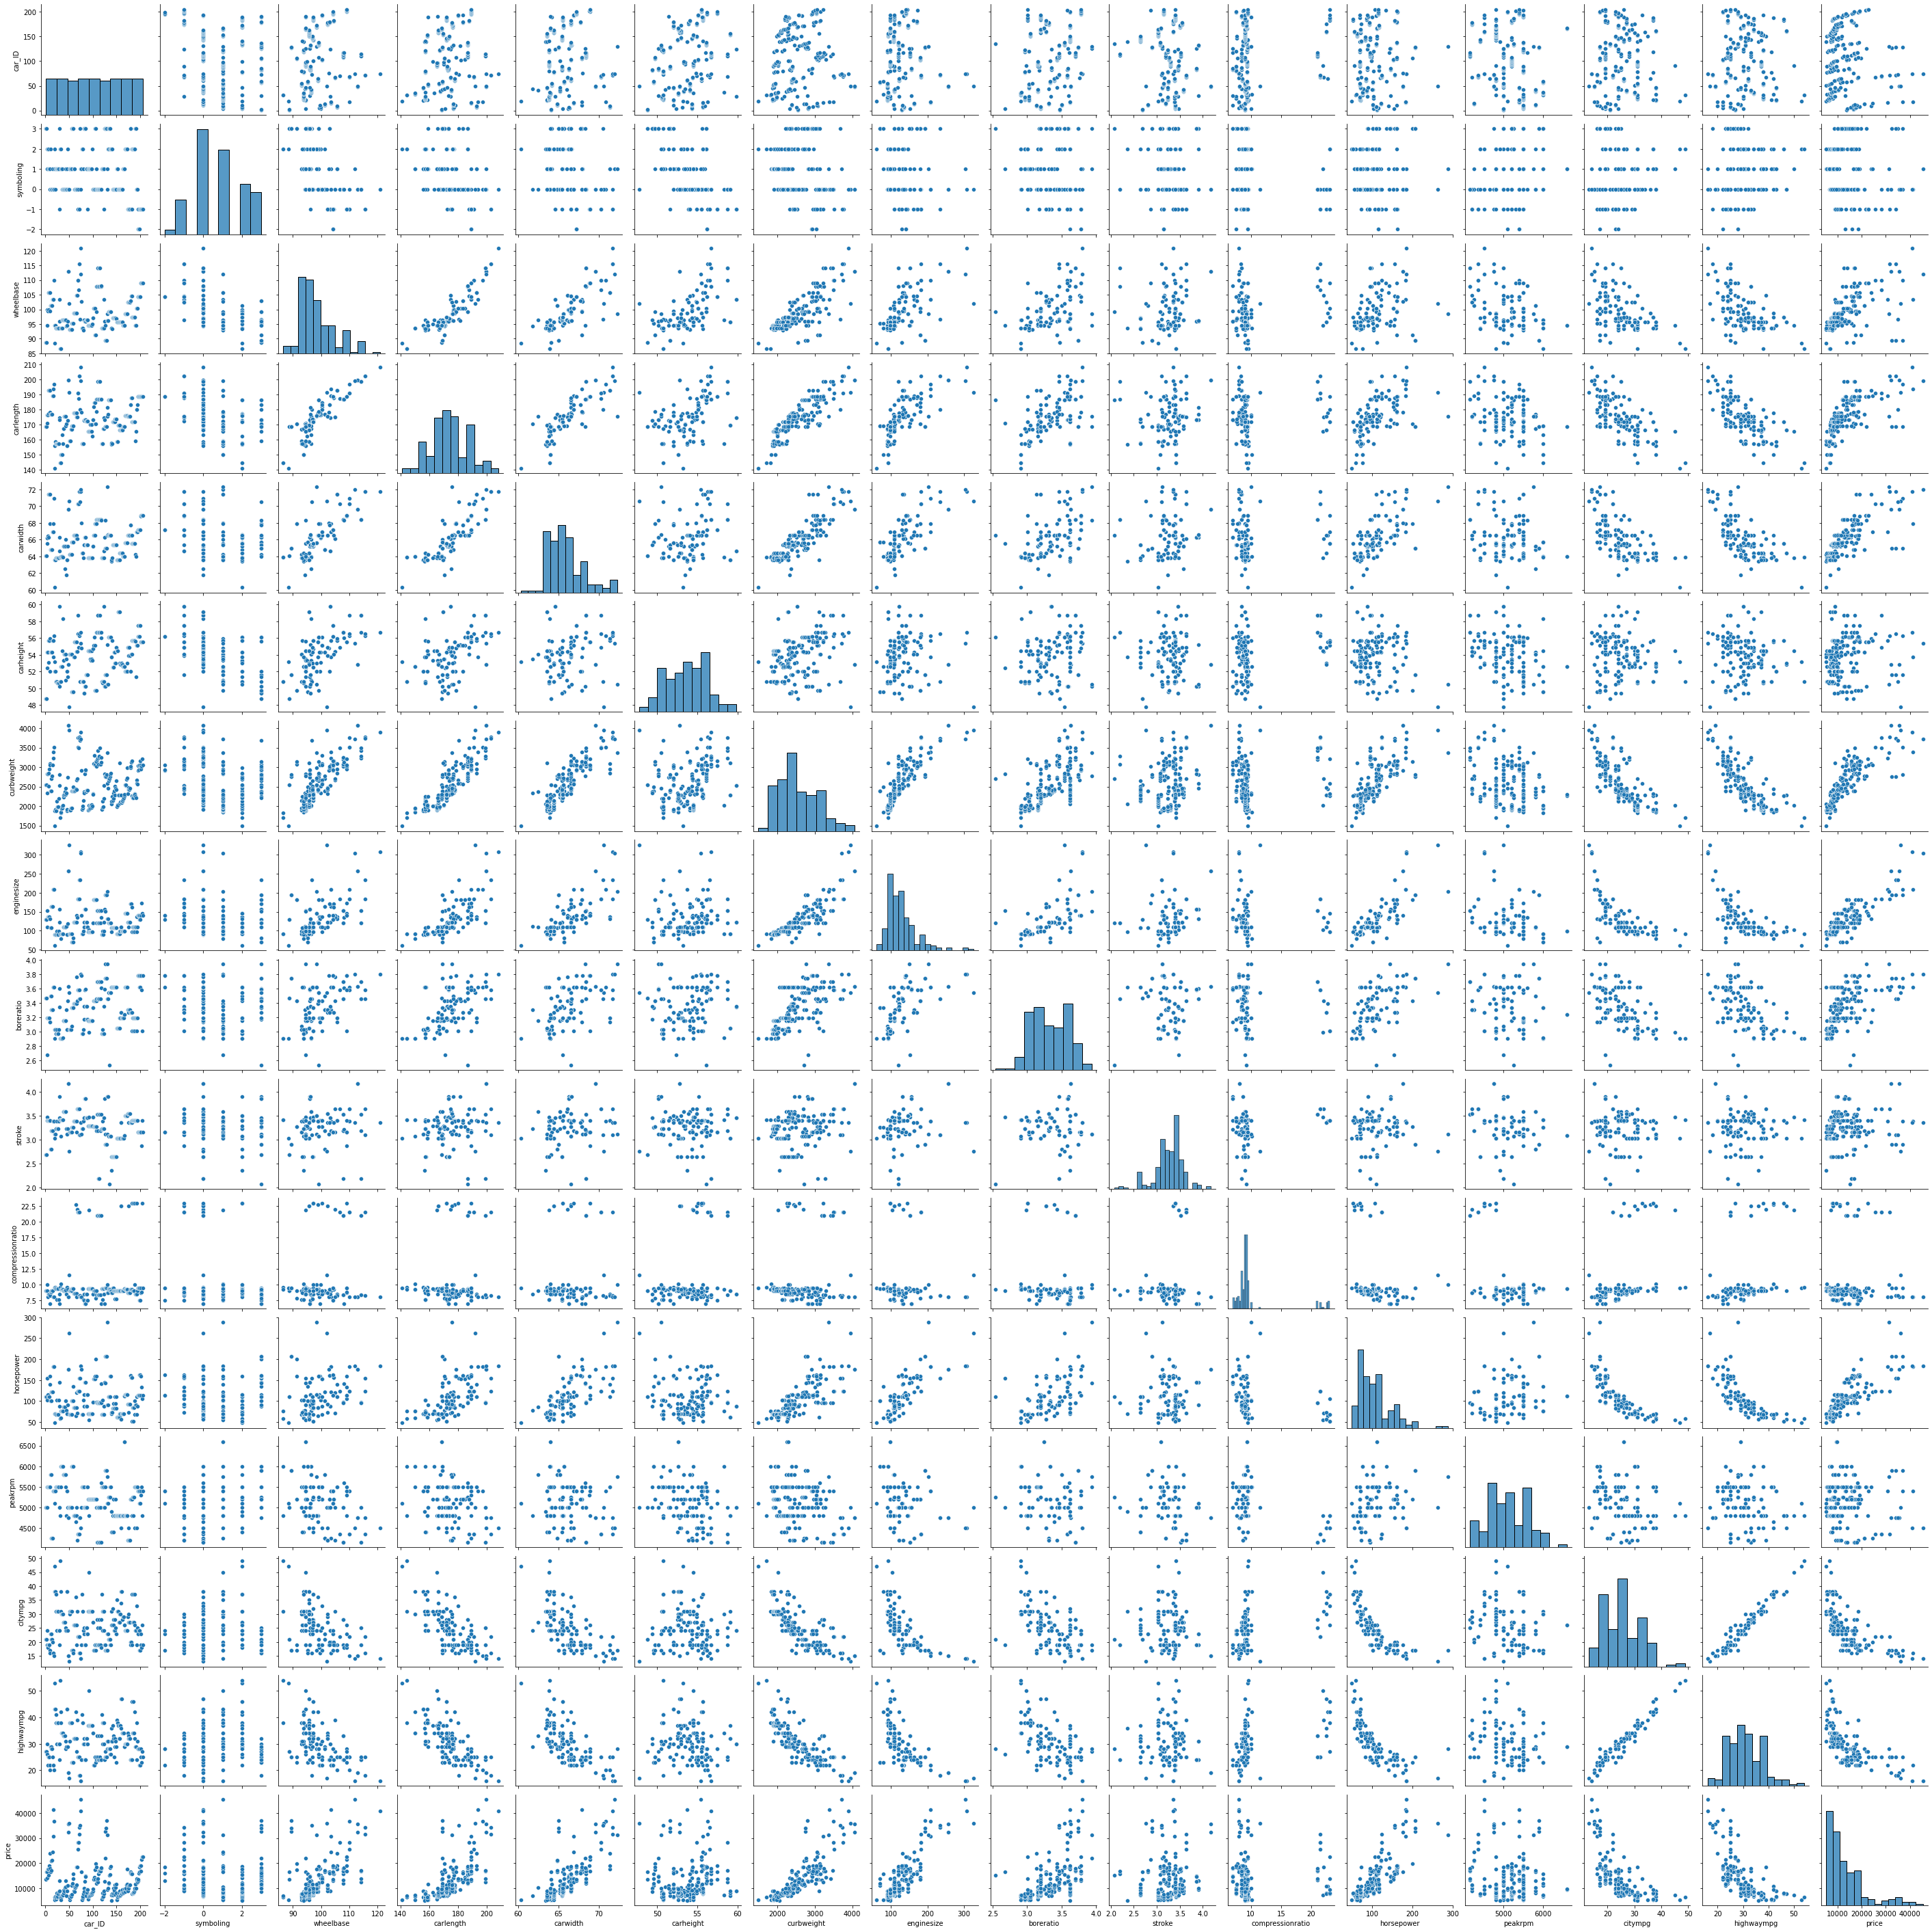

In [26]:
sns.pairplot(df_new)

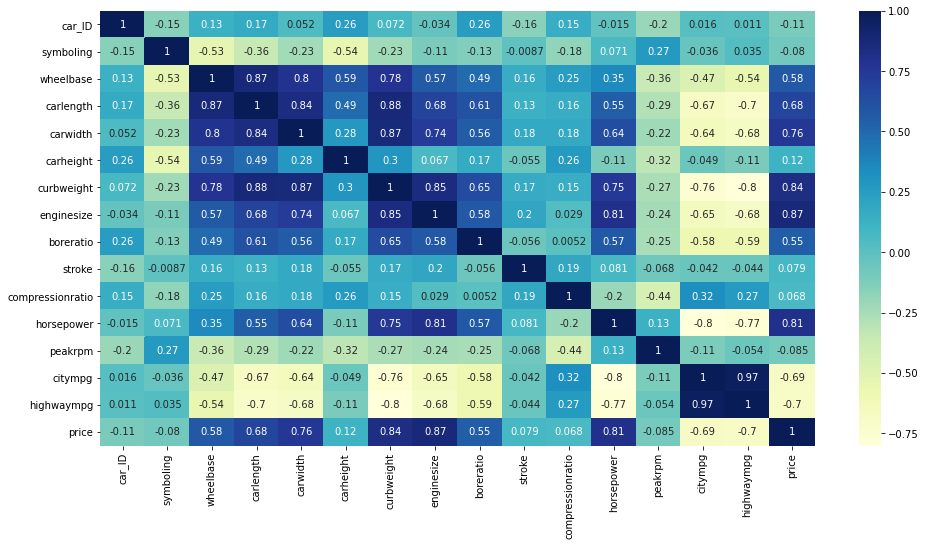

In [28]:
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


In [29]:
df_new.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [31]:
df_new.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [32]:
X = df[['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [33]:
y = df['price']

In [34]:
from sklearn.preprocessing import scale


In [36]:
X = pd.DataFrame(scale(X))

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [39]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}



In [40]:
ridge = Ridge()

In [41]:
ridge.fit(X_train,y_train)

Ridge()

In [42]:
pred = ridge.predict(X_test)

In [43]:
folds = 5 

In [44]:
model_cv = GridSearchCV(ridge,param_grid=params,cv=folds,scoring='neg_mean_absolute_error',verbose=1,return_train_score=True)

In [46]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [49]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004101,0.001033,0.003057,0.000738,0.0001,{'alpha': 0.0001},-1939.023865,-2803.235885,-2591.574119,-2686.344536,-3217.007076,-2647.437096,413.561843,26
1,0.004061,0.001223,0.002286,0.000671,0.001,{'alpha': 0.001},-1938.974462,-2803.210827,-2591.471807,-2686.338037,-3216.934884,-2647.386003,413.559639,25
2,0.002781,0.000250,0.001865,0.000110,0.01,{'alpha': 0.01},-1938.481357,-2802.961465,-2590.451080,-2686.272343,-3216.215994,-2646.876448,413.538273,24
3,0.002655,0.000118,0.001789,0.000102,0.05,{'alpha': 0.05},-1936.309844,-2801.879363,-2585.966580,-2685.965492,-3213.085820,-2644.641420,413.457820,23
4,0.002534,0.000068,0.001782,0.000032,0.1,{'alpha': 0.1},-1933.640120,-2800.583941,-2580.477458,-2685.550250,-3209.314274,-2641.913209,413.388360,22


In [50]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


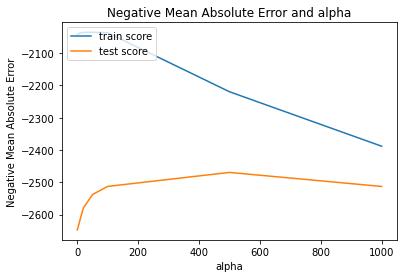

In [60]:
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [61]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-737.13885638,  444.34409763,  388.28622427,   -4.88955252,
       1325.71834959,  194.14568552, 1081.71281136, 2920.50679527,
        204.3149409 , -720.65736333,  748.38606015, 1599.47256202,
        633.09229163, -334.98247496, -350.33303074])

# Lasso Regression

In [53]:
lasso = Lasso()

In [54]:
model_cv = GridSearchCV(lasso,param_grid=params,cv=folds,return_train_score=True,scoring='neg_mean_absolute_error',verbose=1)

In [55]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [58]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009128,0.008129,0.003262,0.001580,0.0001,{'alpha': 0.0001},-1939.029047,-2803.238500,-2591.584729,-2686.345490,...,-2647.442439,413.562023,28,-2177.415456,-2089.185289,-2076.620288,-1987.951048,-1885.757897,-2043.385996,99.081422
1,0.005051,0.001259,0.002874,0.000894,0.001,{'alpha': 0.001},-1939.026268,-2803.236963,-2591.577981,-2686.347579,...,-2647.439441,413.561423,27,-2177.414670,-2089.184843,-2076.619951,-1987.949976,-1885.755917,-2043.385071,99.081895
2,0.003316,0.000301,0.001960,0.000093,0.01,{'alpha': 0.01},-1938.998503,-2803.221585,-2591.512854,-2686.368468,...,-2647.409944,413.555374,26,-2177.406820,-2089.180381,-2076.616463,-1987.939255,-1885.736123,-2043.375809,99.086623
3,0.003992,0.001063,0.003281,0.000934,0.05,{'alpha': 0.05},-1938.874992,-2803.153371,-2591.225526,-2686.461256,...,-2647.279325,413.528592,25,-2177.371861,-2089.160561,-2076.602170,-1987.891647,-1885.648196,-2043.334887,99.107679
4,0.003177,0.000397,0.002061,0.000316,0.1,{'alpha': 0.1},-1938.720742,-2803.067263,-2590.867317,-2686.577359,...,-2647.116175,413.495112,24,-2177.328251,-2089.135739,-2076.584887,-1987.832046,-1885.538347,-2043.283854,99.134053


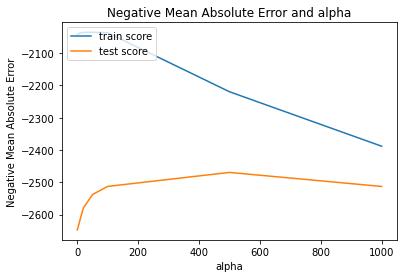

In [59]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
aplha = 5 

In [63]:
lasso = Lasso(alpha=alpha)

In [64]:
lasso.fit(X_train,y_train)

Lasso(alpha=15)

In [65]:
lasso.coef_

array([-708.51074916,  486.88829932,  423.54722835, -372.74907924,
       1464.41260889,  449.69852427,  739.13418159, 4167.47944323,
        131.17770161, -918.82723471,  971.94364742, 1144.02904585,
       1010.36152465, -708.15918522,   -0.        ])